Path from S to G found: S -> A -> C -> G


{('S', 'A'): Text(-0.24865585960968095, -0.07380641439319435, '1'),
 ('S', 'G'): Text(-0.6212133403176122, 0.16168134669044054, '10'),
 ('A', 'C'): Text(-0.13927952713873376, -0.5040687304711088, '1'),
 ('A', 'B'): Text(0.6567398257505103, -0.111482118707148, '2'),
 ('G', 'C'): Text(-0.511837007846665, -0.2685809693874739, '4'),
 ('G', 'D'): Text(0.044675212498924866, 0.2977346878165484, '2'),
 ('B', 'D'): Text(0.7604928674563458, 0.34238738378066846, '5')}

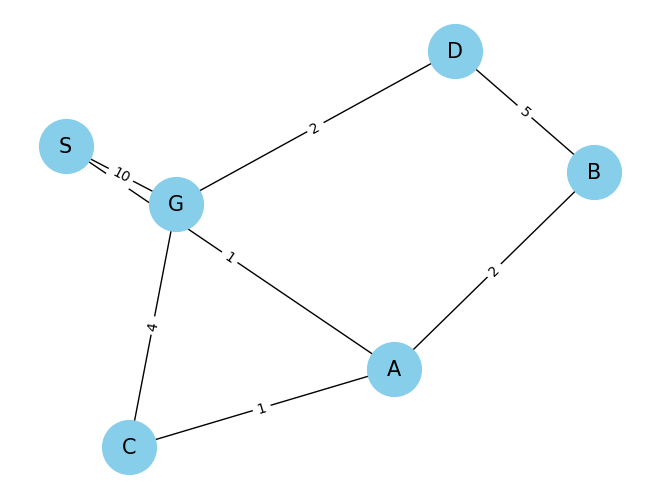

In [1]:
import networkx as nx
import math
import queue

 
def astar(graph, start, goal, heuristic):
    visited = set()
    pri_queue = queue.PriorityQueue()  # Priority queue
    pri_queue.put((0 + heuristic[start], [start]))  # Initial state: f = g + h = 0 + heuristic

    while not pri_queue.empty():
        f, current_path = pri_queue.get()
        current_node = current_path[-1]

        if current_node == goal:
            return current_path  # Goal found

        visited.add(current_node)

        for neighbor in graph.neighbors(current_node):
            if neighbor not in visited:
                g = graph[current_node][neighbor]['weight']  # Cost from start to current node
                new_path = current_path + [neighbor]
                pri_queue.put((g + heuristic[neighbor], new_path))

    return []  # Goal not found


# Example graph
G = nx.Graph()
G.add_weighted_edges_from([('S', 'A', 1), ('S', 'G', 10), ('A', 'C', 1), ('A', 'B', 2), ('B', 'D', 5),('C', 'G', 4),('D', 'G', 2)])

start_node = 'S'
goal_node = 'G'

# Define positions for the nodes (for Euclidean distance calculation)
pos = nx.spring_layout(G)

# Heuristic function using Euclidean distance
heuristic = {node: euclidean_distance(node, goal_node, pos) for node in G.nodes}

path = astar(G, start_node, goal_node, heuristic)
if path:
    print("Path from {} to {} found: {}".format(start_node, goal_node, ' -> '.join(path)))
else:
    print("No path found from {} to {}".format(start_node, goal_node))



nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='k', linewidths=1, font_size=15)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
